# Proyecto 2 - Inteligencia de Negocios

> Juan José Beltrán Ruiz - 201819446

> Santiago Bobadilla Suárez - 201820728


In [ ]:
# Librerías para manejo de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Datos

1. Demografía y Población
2. Salud
3. Educación
4. Vivienda y Servicios Publicos

In [ ]:
# 1. Cargar Datos

demografia = pd.read_excel("Demografía Y Poblacion.xlsx")
salud = pd.read_excel("Salud.xlsx")
educacion = pd.read_excel("Educacion.xlsx")
vivienda = pd.read_excel("Vivienda y Servicios Publicos.xlsx")

### Demografía y Población

In [ ]:
# 2. Filtrar Subcategoría
subcategoria = demografia['Subcategoría'] == 'Población menor y mayor de edad'

# 3. Filtrar Indicador
indicador_1 = demografia['Indicador'] == 'Porcentaje de población menores de 15 años'

# 4. Obtener tabla filtrada
demografia = demografia[subcategoria]
demografia = demografia[indicador_1]

# 5. Genero columna de fecha
demografia['Date'] = ['01-' + str(int(i['Mes'])) + '-' + str(int(i['Año'])) for j,i in demografia.iterrows()]
demografia['Date'] = pd.to_datetime(demografia['Date'], errors='coerce')

# 6. Corregir valores lógicos
demografia['Data_Demographic'] = [str(i['Dato Numérico']).replace(".", "").replace(",", ".") for j,i in demografia.iterrows()]
demografia['Data_Demographic'] = demografia['Data_Demographic'].astype('float64')

demografia.loc[demografia.Data_Demographic < 0, "Data_Demographic"] = np.nan
demografia.loc[demografia.Data_Demographic > 100, "Data_Demographic"] = np.nan

# 7. Eliminar columnas no necesarias
demografia.drop(['Código Departamento', 'Código Entidad', 'Dimensión', 'Dato Cualitativo', 'Fuente', 
            'Unidad de Medida', 'Año', 'Mes', 'Dato Numérico'], axis=1, inplace=True)

# 8. Eliminar NA's
demografia.dropna(inplace = True)

# 9. Guardar nueva tabla
demografia.to_excel("Data_Demografia.xlsx")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


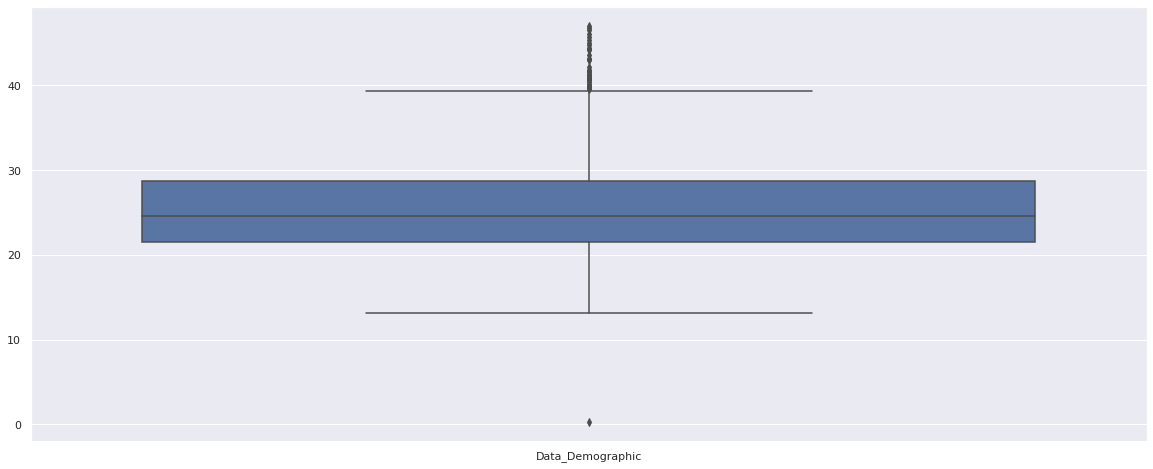

In [ ]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=demografia, orient="v")

In [ ]:
demografia

,Departamento,Entidad,Subcategoría,Indicador,Date,Data_Demographic
801670,Sucre,Sincelejo,Población menor y mayor de edad,Porcentaje de población menores de 15 años,2018-01-12,24.92
801671,Sucre,Buenavista,Población menor y mayor de edad,Porcentaje de población menores de 15 años,2018-01-12,27.44
801672,Sucre,Sucre,Población menor y mayor de edad,Porcentaje de población menores de 15 años,2018-01-12,26.77
801673,Sucre,Caimito,Población menor y mayor de edad,Porcentaje de población menores de 15 años,2018-01-12,28.58
801674,Sucre,Colosó,Población menor y mayor de edad,Porcentaje de población menores de 15 años,2018-01-12,26.58
...,...,...,...,...,...,...
803933,Atlántico,Candelaria,Población menor y mayor de edad,Porcentaje de población menores de 15 años,2019-01-12,29.70
803934,Atlántico,Campo de La Cruz,Población menor y mayor de edad,Porcentaje de población menores de 15 años,2019-01-12,29.42
803935,Atlántico,Baranoa,Población menor y mayor de edad,Porcentaje de población menores de 15 años,2019-01-12,25.32
803936,Atlántico,Barranquilla,Población menor y mayor de edad,Porcentaje de población menores de 15 años,2019-01-12,23.39


### Salud

In [ ]:
# 2. Filtrar Subcategoría
subcategoria = salud['Subcategoría'] == 'Tasas y coberturas'

# 3. Filtrar Indicador
indicador_1 = salud['Indicador'] == 'Tasa de mortalidad infantil en menores de 1 año (x cada 1.000 nacidos vivos)'
indicador_2 = salud['Indicador'] == 'Tasa de mortalidad infantil en menores de 5 años'

# 4. Obtener tabla filtrada
salud = salud[subcategoria]
salud = salud[indicador_1 | indicador_2]

# 5. Genero columna de fecha
salud['Date'] = ['01-' + str(int(i['Mes'])) + '-' + str(int(i['Año'])) for j,i in salud.iterrows()]
salud['Date'] = pd.to_datetime(salud['Date'], errors='coerce')

# 6. Corregir valores lógicos
salud['Data_Health'] = [str(i['Dato Numérico']).replace(".", "").replace(",", ".") for j,i in salud.iterrows()]
salud['Data_Health'] = salud['Data_Health'].astype('float64')

salud.loc[salud.Data_Health < 0, "Data_Health"] = np.nan
salud.loc[salud.Data_Health > 100, "Data_Health"] = np.nan

# 7. Eliminar columnas no necesarias
salud.drop(['Código Departamento', 'Código Entidad', 'Dimensión', 'Dato Cualitativo', 'Fuente', 
            'Unidad de Medida', 'Año', 'Mes', 'Dato Numérico'], axis=1, inplace=True)

# 8. Eliminar NA's
salud.dropna(inplace = True)

# 9. Guardar nueva tabla
salud.to_excel("Data_Salud.xlsx")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


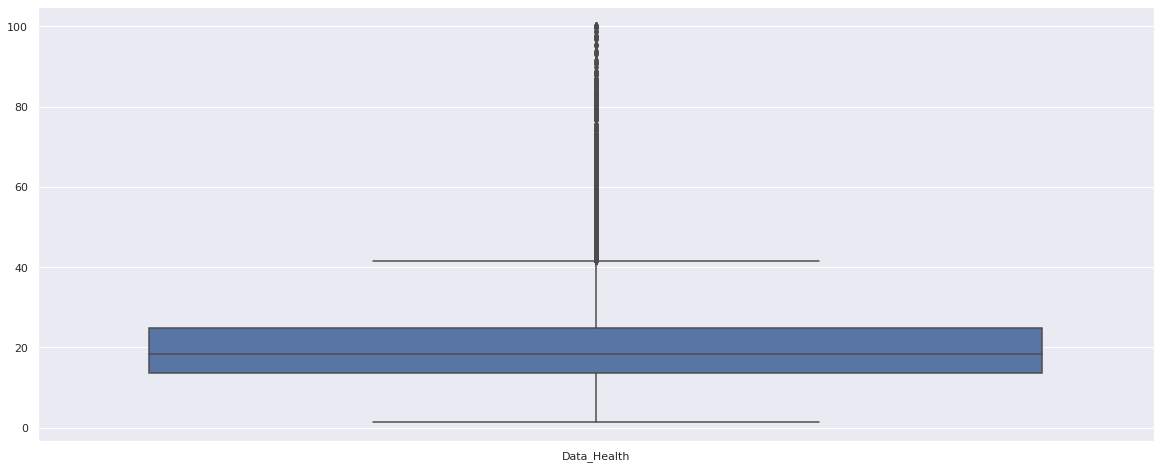

In [ ]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=salud, orient="v")

### Educación

In [ ]:
# 2. Filtrar Subcategoría
subcategoria = educacion['Subcategoría'] == 'Acceso a la educación'

# 3. Filtrar Indicador
indicador_1 = educacion['Indicador'] == 'Cobertura bruta en educación primaria'
indicador_2 = educacion['Indicador'] == 'Cobertura bruta en educación básica'

# 4. Obtener tabla filtrada
educacion = educacion[subcategoria]
educacion = educacion[indicador_1 | indicador_2]

# 5. Genero columna de fecha
educacion['Date'] = ['01-' + str(int(i['Mes'])) + '-' + str(int(i['Año'])) for j,i in educacion.iterrows()]
educacion['Date'] = pd.to_datetime(educacion['Date'], errors='coerce')

# 6. Corregir valores lógicos
educacion['Data_Education'] = [str(i['Dato Numérico']).replace(".", "").replace(",", ".") for j,i in educacion.iterrows()]
educacion['Data_Education'] = educacion['Data_Education'].astype('float64')

educacion.loc[educacion.Data_Education < 0, "Data_Education"] = np.nan
educacion.loc[educacion.Data_Education > 1000, "Data_Education"] = np.nan

# 7. Eliminar columnas no necesarias
educacion.drop(['Código Departamento', 'Código Entidad', 'Dimensión', 'Dato Cualitativo', 'Fuente', 
            'Unidad de Medida', 'Año', 'Mes', 'Dato Numérico'], axis=1, inplace=True)

# 8. Eliminar NA's
educacion.dropna(inplace = True)

# 9. Guardar nueva tabla
educacion.to_excel("Data_Educacion.xlsx")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


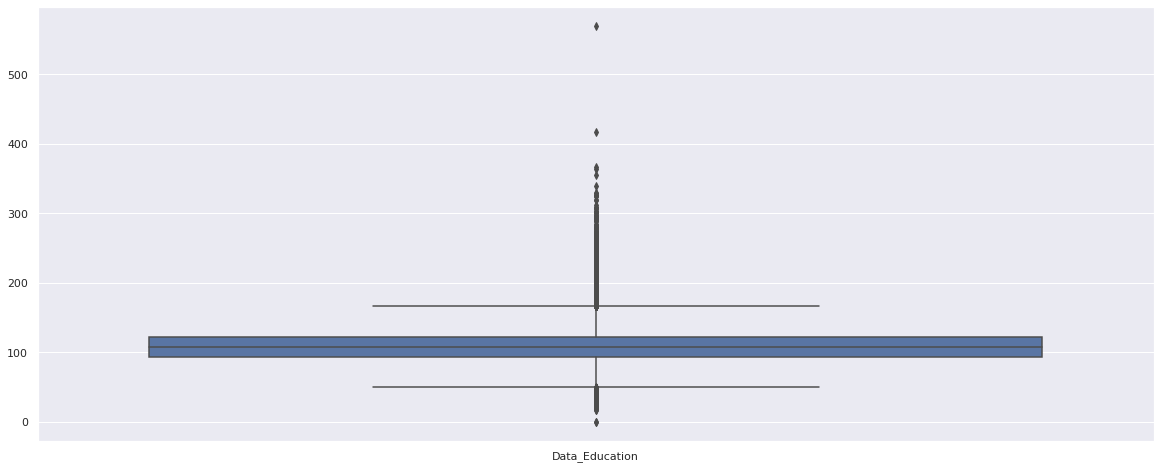

In [ ]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=educacion, orient="v")

### Vivienda y Servicios Publicos

In [ ]:
# 2. Filtrar Subcategoría
subcategoria = vivienda['Subcategoría'] == 'Vivienda y acceso a servicios públicos'

# 3. Filtrar Indicador --> Se van a usar todos

# 4. Obtener tabla filtrada
vivienda = vivienda[subcategoria]

# 5. Genero columna de fecha
vivienda['Date'] = ['01-' + str(int(i['Mes'])) + '-' + str(int(i['Año'])) for j,i in vivienda.iterrows()]
vivienda['Date'] = pd.to_datetime(vivienda['Date'], errors='coerce')

# 6. Corregir valores lógicos
vivienda['Data_Home'] = [str(i['Dato Numérico']).replace(".", "").replace(",", ".") for j,i in vivienda.iterrows()]
vivienda['Data_Home'] = vivienda['Data_Home'].astype('float64')

vivienda.loc[vivienda.Data_Home < 0, "Data_Home"] = np.nan
vivienda.loc[vivienda.Data_Home > 100, "Data_Home"] = np.nan

# 7. Eliminar columnas no necesarias
vivienda.drop(['Código Departamento', 'Código Entidad', 'Dimensión', 'Dato Cualitativo', 'Fuente', 
            'Unidad de Medida', 'Año', 'Mes', 'Dato Numérico'], axis=1, inplace=True)

# 8. Eliminar NA's
vivienda.dropna(inplace = True)

# 9. Guardar nueva tabla
vivienda.to_excel("Data_Home.xlsx")

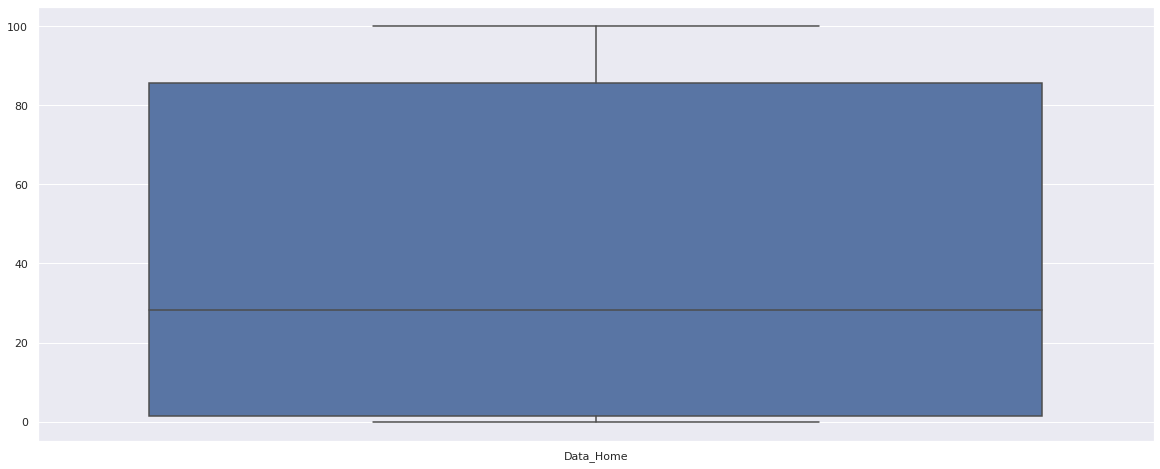

In [ ]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=vivienda, orient="v")

## JOIN's

Union de dimensiones de interés con la tabla de demografía.

In [ ]:
demo_key_1 = demografia['Departamento']
demo_key_2 = demografia['Entidad']
demo_key_3 = demografia['Date']

demo = {'Departamento': demo_key_1, 'Entidad': demo_key_2, 'Date': demo_key_3}
data_demo = pd.DataFrame(demo)

### Salud

In [ ]:
merge_salud = pd.merge(data_demo, salud, on=["Departamento", "Entidad", "Date"], how='left')
merge_salud.dropna(inplace = True)
merge_salud.to_excel("Data_Health_Join.xlsx")
merge_salud

,Departamento,Entidad,Date,Subcategoría,Indicador,Data_Health
0,Sucre,Sincelejo,2018-01-12,Tasas y coberturas,Tasa de mortalidad infantil en menores de 1 añ...,11.54
1,Sucre,Sincelejo,2018-01-12,Tasas y coberturas,Tasa de mortalidad infantil en menores de 5 años,13.29
2,Sucre,Buenavista,2018-01-12,Tasas y coberturas,Tasa de mortalidad infantil en menores de 1 añ...,15.63
3,Sucre,Buenavista,2018-01-12,Tasas y coberturas,Tasa de mortalidad infantil en menores de 5 años,15.63
4,Sucre,Sucre,2018-01-12,Tasas y coberturas,Tasa de mortalidad infantil en menores de 1 añ...,11.19
...,...,...,...,...,...,...
1957,Bolívar,Simití,2018-01-12,Tasas y coberturas,Tasa de mortalidad infantil en menores de 5 años,18.18
1958,Bolívar,Soplaviento,2018-01-12,Tasas y coberturas,Tasa de mortalidad infantil en menores de 1 añ...,27.78
1959,Bolívar,Soplaviento,2018-01-12,Tasas y coberturas,Tasa de mortalidad infantil en menores de 5 años,41.67
1960,Bolívar,Talaigua Nuevo,2018-01-12,Tasas y coberturas,Tasa de mortalidad infantil en menores de 1 añ...,5.95


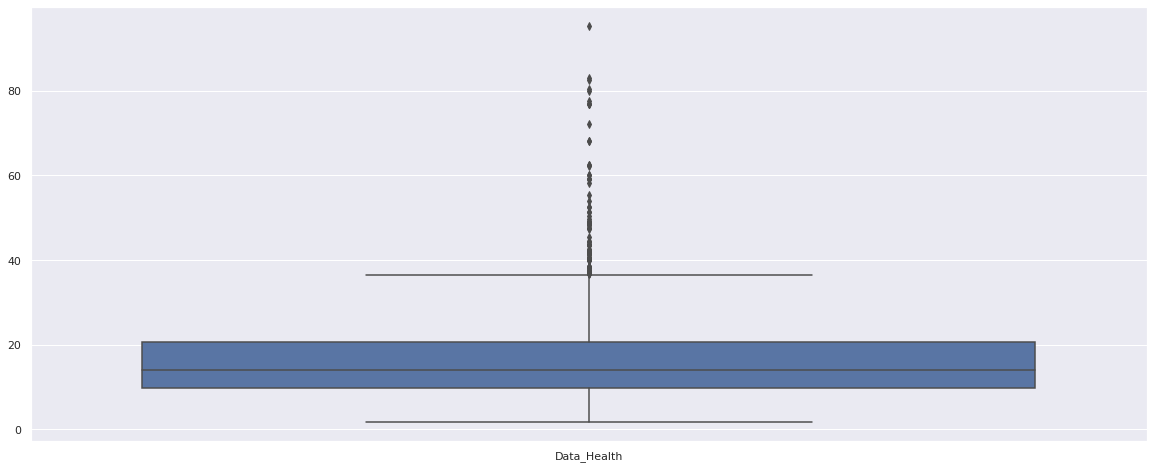

In [ ]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=merge_salud, orient="v")

### Educación

In [ ]:
merge_educacion = pd.merge(data_demo, educacion, on=["Departamento", "Entidad", "Date"], how='left')
merge_educacion.dropna(inplace = True)
merge_educacion.to_excel("Data_Education_Join.xlsx")
merge_educacion

,Departamento,Entidad,Date,Subcategoría,Indicador,Data_Education
0,Sucre,Sincelejo,2018-01-12,Acceso a la educación,Cobertura bruta en educación primaria,121.31
1,Sucre,Sincelejo,2018-01-12,Acceso a la educación,Cobertura bruta en educación básica,117.07
2,Sucre,Buenavista,2018-01-12,Acceso a la educación,Cobertura bruta en educación primaria,114.24
3,Sucre,Buenavista,2018-01-12,Acceso a la educación,Cobertura bruta en educación básica,111.19
4,Sucre,Sucre,2018-01-12,Acceso a la educación,Cobertura bruta en educación primaria,146.08
...,...,...,...,...,...,...
4563,Atlántico,Baranoa,2019-01-12,Acceso a la educación,Cobertura bruta en educación básica,105.93
4564,Atlántico,Barranquilla,2019-01-12,Acceso a la educación,Cobertura bruta en educación primaria,114.84
4565,Atlántico,Barranquilla,2019-01-12,Acceso a la educación,Cobertura bruta en educación básica,115.92
4566,Bogotá,Bogotá,2019-01-12,Acceso a la educación,Cobertura bruta en educación primaria,108.98


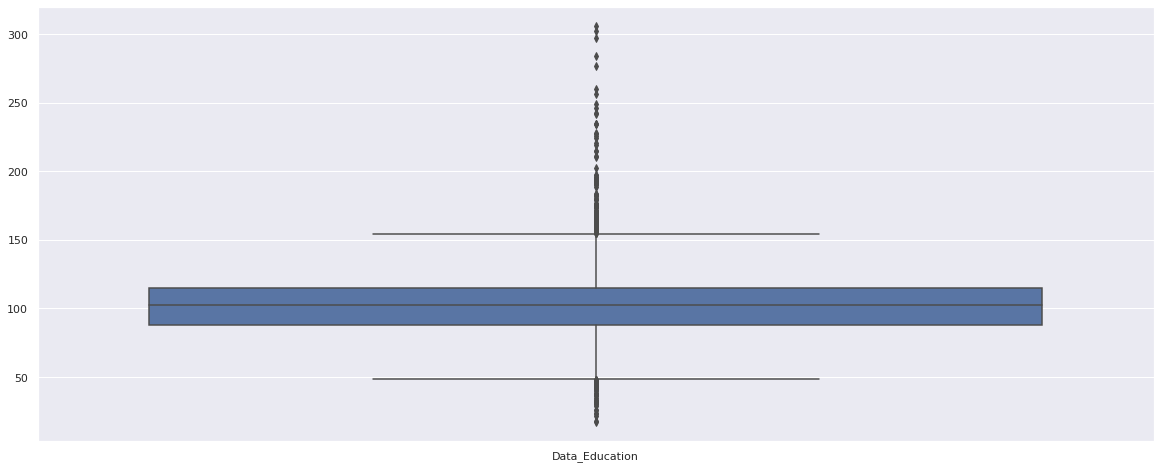

In [ ]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=merge_educacion, orient="v")

### Vivienda y Servicios Publicos

In [ ]:
merge_vivienda = pd.merge(data_demo, vivienda, on=["Departamento", "Entidad", "Date"], how='left')
merge_vivienda.dropna(inplace = True)
merge_vivienda.to_excel("Data_Home_Join.xlsx")
merge_vivienda

,Departamento,Entidad,Date,Subcategoría,Indicador,Data_Home
0,Sucre,Sincelejo,2018-01-12,Vivienda y acceso a servicios públicos,Cobertura de energía eléctrica rural,98.33
1,Sucre,Sincelejo,2018-01-12,Vivienda y acceso a servicios públicos,Penetración de banda ancha,12.66
2,Sucre,Sincelejo,2018-01-12,Vivienda y acceso a servicios públicos,Cobertura de acueducto (Censo),90.86
3,Sucre,Sincelejo,2018-01-12,Vivienda y acceso a servicios públicos,Cobertura de alcantarillado (Censo),87.34
4,Sucre,Sincelejo,2018-01-12,Vivienda y acceso a servicios públicos,Déficit cualitativo de vivienda (Censo),33.55
...,...,...,...,...,...,...
43550,Atlántico,Barranquilla,2019-01-12,Vivienda y acceso a servicios públicos,Cobertura de alcantarillado (REC),97.04
43551,Bogotá,Bogotá,2019-01-12,Vivienda y acceso a servicios públicos,Cobertura de energía eléctrica rural,100.00
43552,Bogotá,Bogotá,2019-01-12,Vivienda y acceso a servicios públicos,Penetración de banda ancha,23.14
43553,Bogotá,Bogotá,2019-01-12,Vivienda y acceso a servicios públicos,Cobertura de acueducto (REC),98.10


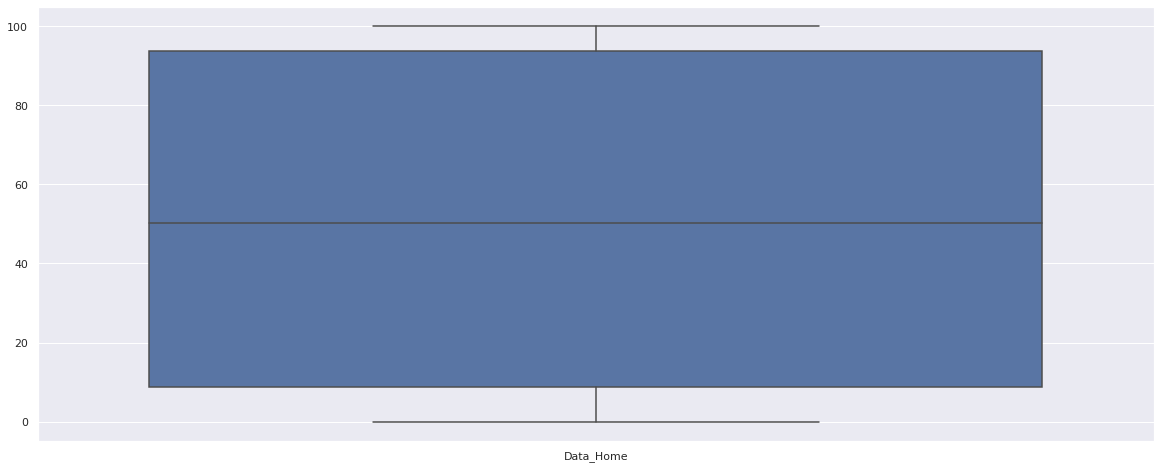

In [ ]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=merge_vivienda, orient="v")

## Correlación

In [ ]:
c_salud = merge_salud['Data_Health']
c_vivienda = merge_vivienda['Data_Home']
c_educacion = merge_educacion['Data_Education']

cor = {'Data_Health': c_salud, 'Data_Home': c_vivienda, 'Data_Education': c_educacion}
data_cor = pd.DataFrame(cor)

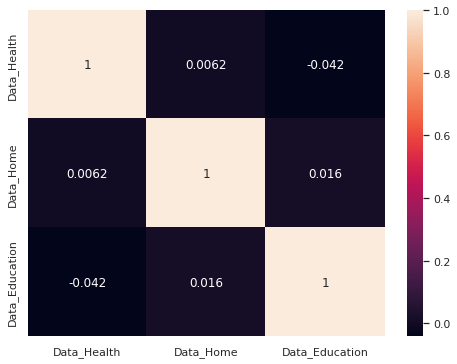

In [ ]:
corr_df = data_cor.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

## TABLAS

1. Fecha
2. Indicador
3. Municipio
4. Demografia
5. Salud
6. Educación
7. Salubridad

### FECHA

In [ ]:
def mes_text(mes):

  if mes == 1: return 'ene'
  elif mes == 2: return 'feb'
  elif mes == 3: return 'mar'
  elif mes == 4: return 'abr'
  elif mes == 5: return 'may'
  elif mes == 6: return 'jun'
  elif mes == 7: return 'jul'
  elif mes == 8: return 'agt'
  elif mes == 9: return 'sep'
  elif mes == 10: return 'oct'
  elif mes == 11: return 'nov'
  else: return 'dic'

In [ ]:
# llave_fecha, dia_valor, mes_valor, mes_texto, anio
dates = {}
combinaciones = []
index = 0

for j,i in demografia.iterrows():

  if not pd.isna(i['Mes']) and not pd.isna(i['Año']):
    new = '01-' + str(int(i['Mes'])) + '-' + str(int(i['Año']))

    if new not in combinaciones:
      combinaciones.append(new)
      dates[index] = [new, 1, int(i['Mes']), mes_text(int(i['Mes'])), int(i['Año'])]
      index += 1

for j,i in salud.iterrows():

  if not pd.isna(i['Mes']) and not pd.isna(i['Año']):
    new = '01-' + str(int(i['Mes'])) + '-' + str(int(i['Año']))

    if new not in combinaciones:
      combinaciones.append(new)
      dates[index] = [new, 1, int(i['Mes']), mes_text(int(i['Mes'])), int(i['Año'])]
      index += 1


for j,i in educacion.iterrows():

  if not pd.isna(i['Mes']) and not pd.isna(i['Año']):
    new = '01-' + str(int(i['Mes'])) + '-' + str(int(i['Año']))

    if new not in combinaciones:
      combinaciones.append(new)
      dates[index] = [new, 1, int(i['Mes']), mes_text(int(i['Mes'])), int(i['Año'])]
      index += 1

for j,i in vivienda.iterrows():

  if not pd.isna(i['Mes']) and not pd.isna(i['Año']):
    new = '01-' + str(int(i['Mes'])) + '-' + str(int(i['Año']))

    if new not in combinaciones:
      combinaciones.append(new)
      dates[index] = [new, 1, int(i['Mes']), mes_text(int(i['Mes'])), int(i['Año'])]
      index += 1

In [ ]:
dates_pd = pd.DataFrame(dates).T
dates_pd.columns = ['llave_fecha', 'dia_valor', 'mes_valor', 'mes_texto', 'anio']
dates_pd['llave_fecha'] = pd.to_datetime(dates_pd['llave_fecha'], errors='coerce')
dates_pd

,llave_fecha,dia_valor,mes_valor,mes_texto,anio
0,2018-01-12,1,12,dic,2018
1,2019-01-12,1,12,dic,2019
2,2020-01-12,1,12,dic,2020
3,2021-01-12,1,12,dic,2021
4,2022-01-12,1,12,dic,2022
...,...,...,...,...,...
74,2018-01-09,1,9,sep,2018
75,2019-01-03,1,3,mar,2019
76,2019-01-09,1,9,sep,2019
77,2008-01-09,1,9,sep,2008


In [ ]:
from google.colab import files
dates_pd.to_csv('dimension_city.csv', encoding = 'utf-8') 
files.download('dimension_city.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### INDICADOR

In [ ]:
# llave_indicador, subcategoria, nombre_indicador

indicador = {}
combinaciones = []
index = 0

for j,i in demografia.iterrows():

  if not pd.isna(i['Subcategoría']) and not pd.isna(i['Indicador']):
    new = i['Subcategoría'] + '-' + i['Indicador']

    if new not in combinaciones:
      combinaciones.append(new)
      indicador[index] = [i['Subcategoría'], i['Indicador']]
      index += 1

for j,i in salud.iterrows():

  if not pd.isna(i['Subcategoría']) and not pd.isna(i['Indicador']):
    new = i['Subcategoría'] + '-' + i['Indicador']

    if new not in combinaciones:
      combinaciones.append(new)
      indicador[index] = [i['Subcategoría'], i['Indicador']]
      index += 1

for j,i in educacion.iterrows():

  if not pd.isna(i['Subcategoría']) and not pd.isna(i['Indicador']):
    new = i['Subcategoría'] + '-' + i['Indicador']

    if new not in combinaciones:
      combinaciones.append(new)
      indicador[index] = [i['Subcategoría'], i['Indicador']]
      index += 1

for j,i in vivienda.iterrows():

  if not pd.isna(i['Subcategoría']) and not pd.isna(i['Indicador']):
    new = i['Subcategoría'] + '-' + i['Indicador']

    if new not in combinaciones:
      combinaciones.append(new)
      indicador[index] = [i['Subcategoría'], i['Indicador']]
      index += 1

In [ ]:
indicador_pd = pd.DataFrame(indicador).T
indicador_pd.reset_index(inplace=True)
indicador_pd.columns = ['llave_indicador', 'subcategoria', 'nombre_indicador']
indicador_pd

,llave_indicador,subcategoria,nombre_indicador
0,0,Población de hombres,Población de hombres de 00-04
1,1,Población de hombres,Población de hombres de 05-09
2,2,Población de hombres,Población de hombres de 10-14
3,3,Población de hombres,Población de hombres de 15-19
4,4,Población de hombres,Población de hombres de 20-24
...,...,...,...
293,293,Vivienda y acceso a servicios públicos,Cobertura de Aseo Urbana (Censo)
294,294,Vivienda y acceso a servicios públicos,Cobertura de Aseo Rural (Censo)
295,295,Vivienda y acceso a servicios públicos,Cobertura de Internet (Censo)
296,296,Vivienda y acceso a servicios públicos,Cobertura de Internet Urbana (Censo)


In [ ]:
indicador_pd.to_csv("dimension_indicador.csv")
files.download("dimension_indicador.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### MUNICIPIO

In [ ]:
# llave_municipio, departamento, nombre_municipio

municipios = {}
combinaciones = []
index = 0

for j,i in demografia.iterrows():

  if not pd.isna(i['Código Entidad']) and not pd.isna(i['Entidad']) and not pd.isna(i['Departamento']):
    new = str(i['Código Entidad']) + '-' + i['Entidad'] + '-' + i['Departamento']

    if new not in combinaciones:
      combinaciones.append(new)
      municipios[index] = [i['Código Entidad'], i['Departamento'], i['Entidad']]
      index += 1

for j,i in salud.iterrows():

  if not pd.isna(i['Código Entidad']) and not pd.isna(i['Entidad']) and not pd.isna(i['Departamento']):
    new = str(i['Código Entidad']) + '-' + i['Entidad'] + '-' + i['Departamento']

    if new not in combinaciones:
      combinaciones.append(new)
      municipios[index] = [i['Código Entidad'], i['Departamento'], i['Entidad']]
      index += 1

for j,i in educacion.iterrows():

  if not pd.isna(i['Código Entidad']) and not pd.isna(i['Entidad']) and not pd.isna(i['Departamento']):
    new = str(i['Código Entidad']) + '-' + i['Entidad'] + '-' + i['Departamento']

    if new not in combinaciones:
      combinaciones.append(new)
      municipios[index] = [i['Código Entidad'], i['Departamento'], i['Entidad']]
      index += 1

for j,i in vivienda.iterrows():

  if not pd.isna(i['Código Entidad']) and not pd.isna(i['Entidad']) and not pd.isna(i['Departamento']):
    new = str(i['Código Entidad']) + '-' + i['Entidad'] + '-' + i['Departamento']

    if new not in combinaciones:
      combinaciones.append(new)
      municipios[index] = [i['Código Entidad'], i['Departamento'], i['Entidad']]
      index += 1

In [ ]:
municipios_pd = pd.DataFrame(municipios).T
municipios_pd.columns = ['llave_municipio', 'departamento', 'nombre_municipio']
municipios_pd

,llave_municipio,departamento,nombre_municipio
0,68000.0,Santander,Santander
1,68001.0,Santander,Bucaramanga
2,68013.0,Santander,Aguada
3,68020.0,Santander,Albania
4,68051.0,Santander,Aratoca
...,...,...,...
1129,13810.0,Bolívar,Tiquisio
1130,13836.0,Bolívar,Turbaco
1131,13838.0,Bolívar,Turbaná
1132,13873.0,Bolívar,Villanueva


In [ ]:
municipios_pd.to_csv("dimension_municipio.csv")
files.download("dimension_municipio.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### DEMOGRAFIA

In [ ]:
# 1. Corregir valores lógicos
demografia['Data_Demographic'] = [str(i['Dato Numérico']).replace(".", "").replace(",", ".") for j,i in demografia.iterrows()]
demografia['Data_Demographic'] = demografia['Data_Demographic'].astype('float64')

demografia.loc[demografia.Data_Demographic < 0, "Data_Demographic"] = np.nan
demografia.loc[demografia.Data_Demographic > 100, "Data_Demographic"] = np.nan

# 2. Eliminar columnas no necesarias
demografia.drop(['Código Departamento', 'Departamento', 'Entidad', 'Dimensión', 'Dato Cualitativo', 'Fuente', 
            'Unidad de Medida', 'Dato Numérico', 'Subcategoría'], axis=1, inplace=True)

# 3. Eliminar NA's
demografia.dropna(inplace = True)

# 4. Renombrar Columnas
demografia.rename(columns = {'Año': 'anio', 'Mes': 'mes_valor', 'Indicador':'nombre_indicador', 
                             'Subcategoría': 'subcategoria', 'Data_Demographic': 'valor_dmgrfc',
                             'Código Entidad': 'llave_municipio'}, inplace = True)

# 5. JOIN con las fechas
merge_demografia = pd.merge(dates_pd, demografia, on=["mes_valor", "anio"], how='left')
merge_demografia.dropna(inplace = True)

# 6. Eliminar columnas no necesarias
merge_demografia.drop(['dia_valor', 'mes_valor', 'mes_texto', 'anio'], axis=1, inplace=True)
merge_demografia.dropna(inplace = True)

# 7. JOIN con los indicadores
merge_demografia = pd.merge(merge_demografia, indicador_pd, on=["nombre_indicador"], how='left')
merge_demografia.dropna(inplace = True)

# 8. Eliminar columnas no necesarias
merge_demografia.drop(['nombre_indicador', 'subcategoria'], axis=1, inplace=True)
merge_demografia.dropna(inplace = True)

# 9. Añadir llave de la tabla y renombrar columnas
merge_demografia.reset_index(inplace = True)
merge_demografia.rename(columns = {'index': 'llave_dmgrfc', 'llave_municipio': 'fk_municipio', 'llave_indicador': 'fk_indicador',
                                    'llave_fecha': 'fk_fecha'}, inplace = True)

# 10. Ordenar la tabla
merge_demografia = merge_demografia[['llave_dmgrfc', 'fk_municipio', 'fk_indicador', 'fk_fecha', 'valor_dmgrfc']]
merge_demografia

,llave_dmgrfc,fk_municipio,fk_indicador,fk_fecha,valor_dmgrfc
0,0,68013.0,0,2018-01-12,57.0
1,1,68121.0,0,2018-01-12,56.0
2,2,68160.0,0,2018-01-12,76.0
3,3,68245.0,0,2018-01-12,54.0
4,4,68322.0,0,2018-01-12,75.0
...,...,...,...,...,...
445086,445086,13549.0,139,2019-01-06,4.0
445087,445087,13580.0,139,2019-01-06,95.0
445088,445088,13620.0,139,2019-01-06,11.0
445089,445089,13650.0,139,2019-01-06,50.0


In [ ]:
merge_demografia.to_csv("fact_dmgrfc.csv")
files.download("fact_dmgrfc.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### EDUCACIÓN

In [ ]:
# 1. Corregir valores lógicos
educacion['Data_Education'] = [str(i['Dato Numérico']).replace(".", "").replace(",", ".") for j,i in educacion.iterrows()]
educacion['Data_Education'] = educacion['Data_Education'].astype('float64')

educacion.loc[educacion.Data_Education < 0, "Data_Education"] = np.nan
educacion.loc[educacion.Data_Education > 1000, "Data_Education"] = np.nan

# 2. Eliminar columnas no necesarias
educacion.drop(['Código Departamento', 'Departamento', 'Entidad', 'Dimensión', 'Dato Cualitativo', 'Fuente', 
            'Unidad de Medida', 'Dato Numérico', 'Subcategoría'], axis=1, inplace=True)

# 3. Eliminar NA's
educacion.dropna(inplace = True)

# 4. Renombrar Columnas
educacion.rename(columns = {'Año': 'anio', 'Mes': 'mes_valor', 'Indicador':'nombre_indicador', 
                             'Subcategoría': 'subcategoria', 'Data_Education': 'valor_edcn',
                             'Código Entidad': 'llave_municipio'}, inplace = True)

# 5. JOIN con las fechas
merge_educacion = pd.merge(dates_pd, educacion, on=["mes_valor", "anio"], how='left')
merge_educacion.dropna(inplace = True)

# 6. Eliminar columnas no necesarias
merge_educacion.drop(['dia_valor', 'mes_valor', 'mes_texto', 'anio'], axis=1, inplace=True)
merge_educacion.dropna(inplace = True)

# 7. JOIN con los indicadores
merge_educacion = pd.merge(merge_educacion, indicador_pd, on=["nombre_indicador"], how='left')
merge_educacion.dropna(inplace = True)

# 8. Eliminar columnas no necesarias
merge_educacion.drop(['nombre_indicador', 'subcategoria'], axis=1, inplace=True)
merge_educacion.dropna(inplace = True)

# 9. Añadir llave de la tabla y renombrar columnas
merge_educacion.reset_index(inplace = True)
merge_educacion.rename(columns = {'index': 'llave_edcn', 'llave_municipio': 'fk_municipio', 'llave_indicador': 'fk_indicador',
                                    'llave_fecha': 'fk_fecha'}, inplace = True)

# 10. Ordenar la tabla
merge_educacion = merge_educacion[['llave_edcn', 'fk_municipio', 'fk_indicador', 'fk_fecha', 'valor_edcn']]
merge_educacion

,llave_edcn,fk_municipio,fk_indicador,fk_fecha,valor_edcn
0,0,52885.0,232,2018-01-12,82.97
1,1,52838.0,232,2018-01-12,83.80
2,2,52835.0,232,2018-01-12,64.47
3,3,52788.0,232,2018-01-12,64.43
4,4,52786.0,232,2018-01-12,44.17
...,...,...,...,...,...
269709,269709,99773.0,257,2019-01-11,42.81
269710,269710,99624.0,257,2019-01-11,46.68
269711,269711,99524.0,257,2019-01-11,51.14
269712,269712,99001.0,257,2019-01-11,49.46


In [ ]:
merge_educacion.to_csv("fact_edcn.csv")
files.download("fact_edcn.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### SALUD

In [ ]:
# 1. Corregir valores lógicos
salud['Data_Health'] = [str(i['Dato Numérico']).replace(".", "").replace(",", ".") for j,i in salud.iterrows()]
salud['Data_Health'] = salud['Data_Health'].astype('float64')

salud.loc[salud.Data_Health < 0, "Data_Health"] = np.nan
salud.loc[salud.Data_Health > 100, "Data_Health"] = np.nan

# 2. Eliminar columnas no necesarias
salud.drop(['Código Departamento', 'Departamento', 'Entidad', 'Dimensión', 'Dato Cualitativo', 'Fuente', 
            'Unidad de Medida', 'Dato Numérico', 'Subcategoría'], axis=1, inplace=True)

# 3. Eliminar NA's
salud.dropna(inplace = True)

# 4. Renombrar Columnas
salud.rename(columns = {'Año': 'anio', 'Mes': 'mes_valor', 'Indicador':'nombre_indicador', 
                             'Subcategoría': 'subcategoria', 'Data_Health': 'valor_salud',
                             'Código Entidad': 'llave_municipio'}, inplace = True)

# 5. JOIN con las fechas
merge_salud = pd.merge(dates_pd, salud, on=["mes_valor", "anio"], how='left')
merge_salud.dropna(inplace = True)

# 6. Eliminar columnas no necesarias
merge_salud.drop(['dia_valor', 'mes_valor', 'mes_texto', 'anio'], axis=1, inplace=True)
merge_salud.dropna(inplace = True)

# 7. JOIN con los indicadores
merge_salud = pd.merge(merge_salud, indicador_pd, on=["nombre_indicador"], how='left')
merge_salud.dropna(inplace = True)

# 8. Eliminar columnas no necesarias
merge_salud.drop(['nombre_indicador', 'subcategoria'], axis=1, inplace=True)
merge_salud.dropna(inplace = True)

# 9. Añadir llave de la tabla y renombrar columnas
merge_salud.reset_index(inplace = True)
merge_salud.rename(columns = {'index': 'llave_salud', 'llave_municipio': 'fk_municipio', 'llave_indicador': 'fk_indicador',
                                    'llave_fecha': 'fk_fecha'}, inplace = True)

# 10. Ordenar la tabla
merge_salud = merge_salud[['llave_salud', 'fk_municipio', 'fk_indicador', 'fk_fecha', 'valor_salud']]
merge_salud

,llave_salud,fk_municipio,fk_indicador,fk_fecha,valor_salud
0,0,15106.0,178,2018-01-12,84.00
1,1,15114.0,178,2018-01-12,81.00
2,2,15232.0,178,2018-01-12,98.00
3,3,15380.0,178,2018-01-12,62.00
4,4,15401.0,178,2018-01-12,60.00
...,...,...,...,...,...
285464,285464,17088.0,222,2015-01-11,7.14
285465,285465,17174.0,222,2015-01-11,8.40
285466,285466,17272.0,222,2015-01-11,0.00
285467,285467,17380.0,222,2015-01-11,15.56


In [ ]:
merge_salud.to_csv("fact_salud.csv")
files.download("fact_salud.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### VIVIENDA

In [ ]:
# 1. Corregir valores lógicos
vivienda['Data_Home'] = [str(i['Dato Numérico']).replace(".", "").replace(",", ".") for j,i in vivienda.iterrows()]
vivienda['Data_Home'] = vivienda['Data_Home'].astype('float64')

vivienda.loc[vivienda.Data_Home < 0, "Data_Home"] = np.nan
vivienda.loc[vivienda.Data_Home > 100, "Data_Home"] = np.nan

# 2. Eliminar columnas no necesarias
vivienda.drop(['Código Departamento', 'Departamento', 'Entidad', 'Dimensión', 'Dato Cualitativo', 'Fuente', 
            'Unidad de Medida', 'Dato Numérico', 'Subcategoría'], axis=1, inplace=True)

# 3. Eliminar NA's
vivienda.dropna(inplace = True)

# 4. Renombrar Columnas
vivienda.rename(columns = {'Año': 'anio', 'Mes': 'mes_valor', 'Indicador':'nombre_indicador', 
                             'Subcategoría': 'subcategoria', 'Data_Home': 'valor_salubridad',
                             'Código Entidad': 'llave_municipio'}, inplace = True)

# 5. JOIN con las fechas
merge_vivienda = pd.merge(dates_pd, vivienda, on=["mes_valor", "anio"], how='left')
merge_vivienda.dropna(inplace = True)

# 6. Eliminar columnas no necesarias
merge_vivienda.drop(['dia_valor', 'mes_valor', 'mes_texto', 'anio'], axis=1, inplace=True)
merge_vivienda.dropna(inplace = True)

# 7. JOIN con los indicadores
merge_vivienda = pd.merge(merge_vivienda, indicador_pd, on=["nombre_indicador"], how='left')
merge_vivienda.dropna(inplace = True)

# 8. Eliminar columnas no necesarias
merge_vivienda.drop(['nombre_indicador', 'subcategoria'], axis=1, inplace=True)
merge_vivienda.dropna(inplace = True)

# 9. Añadir llave de la tabla y renombrar columnas
merge_vivienda.reset_index(inplace = True)
merge_vivienda.rename(columns = {'index': 'llave_salubridad', 'llave_municipio': 'fk_municipio', 'llave_indicador': 'fk_indicador',
                                    'llave_fecha': 'fk_fecha'}, inplace = True)

# 10. Ordenar la tabla
merge_vivienda = merge_vivienda[['llave_salubridad', 'fk_municipio', 'fk_indicador', 'fk_fecha', 'valor_salubridad']]
merge_vivienda

,llave_salubridad,fk_municipio,fk_indicador,fk_fecha,valor_salubridad
0,0,1001.0,262,2018-01-12,86.83
1,1,5000.0,262,2018-01-12,95.18
2,2,5001.0,262,2018-01-12,100.00
3,3,5002.0,262,2018-01-12,97.07
4,4,5004.0,262,2018-01-12,85.12
...,...,...,...,...,...
210257,210257,76041.0,267,2009-01-09,46.16
210258,210258,76000.0,267,2009-01-09,65.69
210259,210259,76036.0,267,2009-01-09,51.00
210260,210260,76020.0,267,2009-01-09,76.51


In [ ]:
merge_vivienda.to_csv("fact_salubridad.csv")